# Project 2: Customer Satisfaction Prediction (Classification)

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib
import numpy as np
import mlflow
import mlflow.sklearn

In [3]:
# Load the dataset
df = pd.read_csv("Passenger_Satisfaction.csv")

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [9]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## Data Cleaning & Preprocessing

In [5]:
df.drop_duplicates(inplace=True)

In [9]:
# Drop unnecessary columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [11]:
# Handle missing values: Fill missing values in 'Arrival Delay in Minutes' with the median
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5588\3917758280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(), inplace=True)


In [13]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Feature Engineering

In [15]:
# Convert 'satisfaction' to a binary numerical format (1 for satisfied, 0 for neutral or dissatisfied)
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})

In [17]:
# Create a new feature: Total Delay (sum of departure and arrival delays)
df["Total Delay"] = df["Departure Delay in Minutes"] + df["Arrival Delay in Minutes"]

In [19]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,43.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,7.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,20.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,0.0


### Exploratory Data Analysis (EDA)

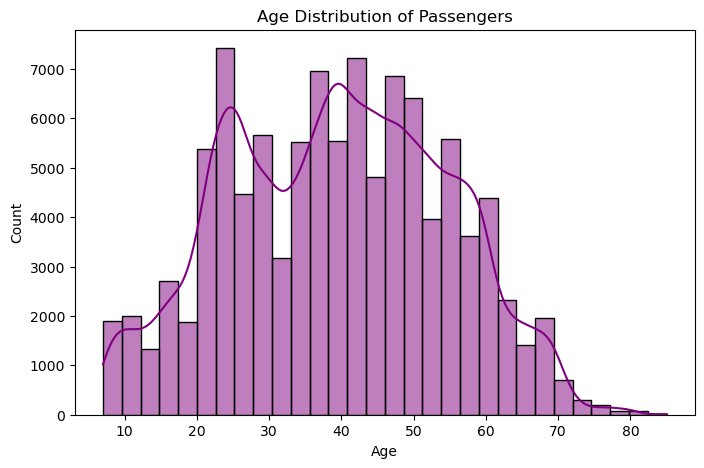

In [89]:
# Age Distribution of Passengers
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="purple")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

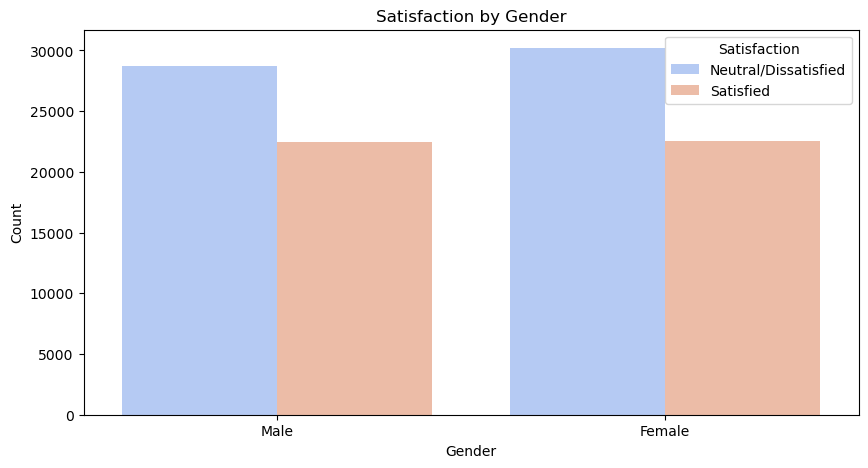

In [91]:
# Satisfaction by Gender
plt.figure(figsize=(10, 5))
sns.countplot(x="Gender", hue="satisfaction", data=df, palette="coolwarm")
plt.title("Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Satisfaction", labels=["Neutral/Dissatisfied", "Satisfied"])
plt.show()

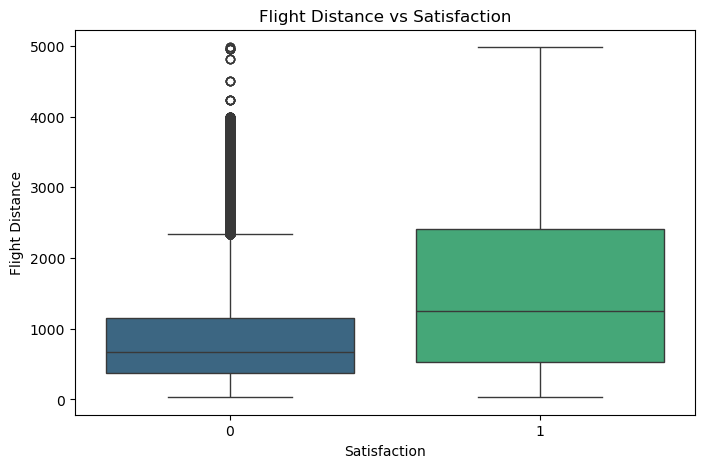

In [93]:
# Flight Distance vs Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(x="satisfaction", y="Flight Distance", hue="satisfaction", data=df, palette="viridis", legend=False)
plt.title("Flight Distance vs Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Flight Distance")
plt.show()

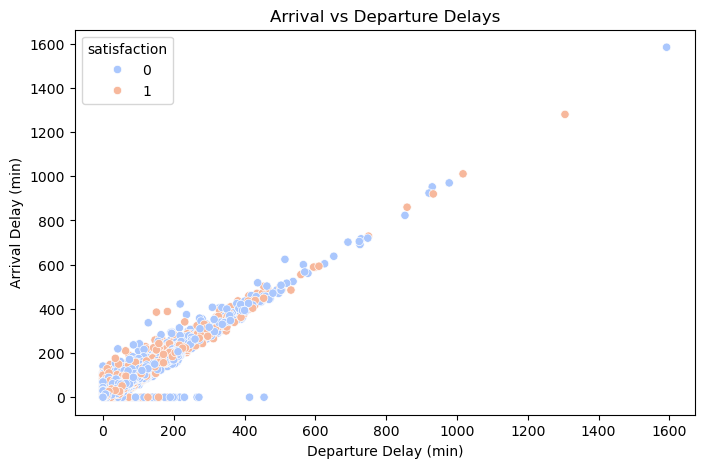

In [95]:
# Delay in Arrival vs Departure
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue="satisfaction", data=df, palette="coolwarm")
plt.title("Arrival vs Departure Delays")
plt.xlabel("Departure Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.show()

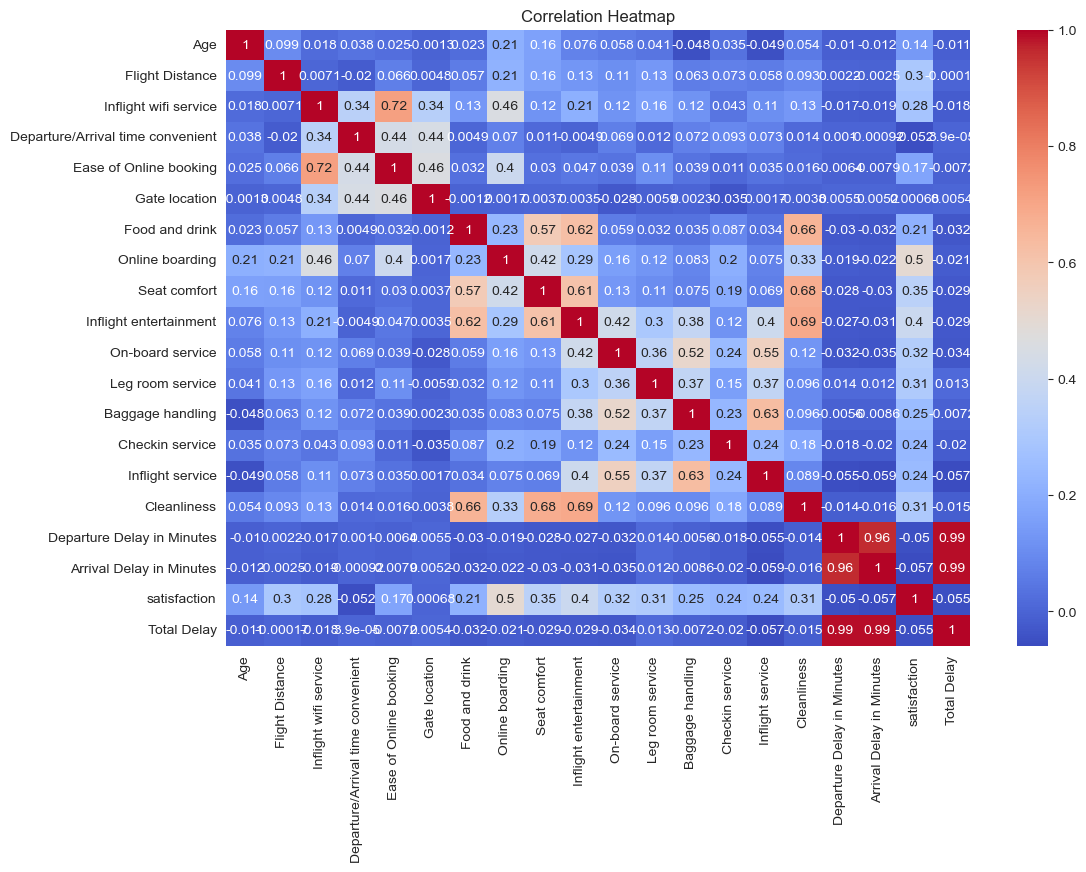

In [107]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

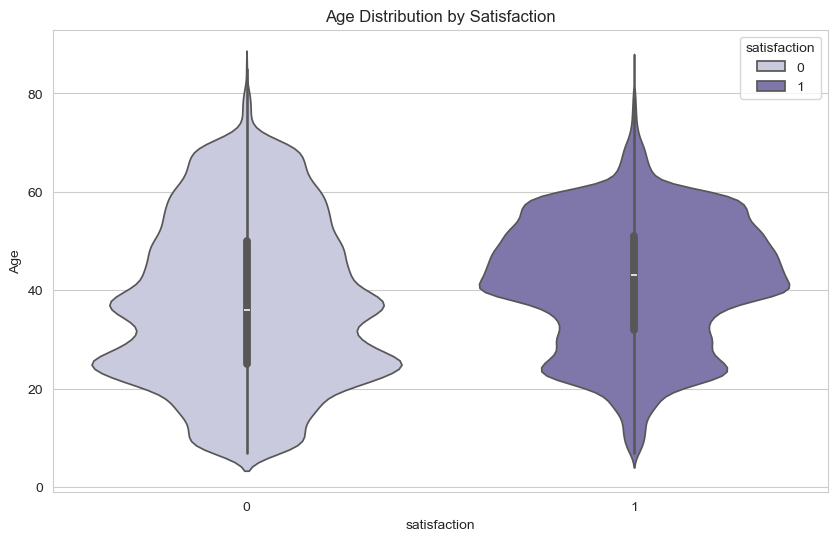

In [109]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='satisfaction', y='Age', data=df, hue='satisfaction', palette='Purples')
plt.title('Age Distribution by Satisfaction')
plt.show()

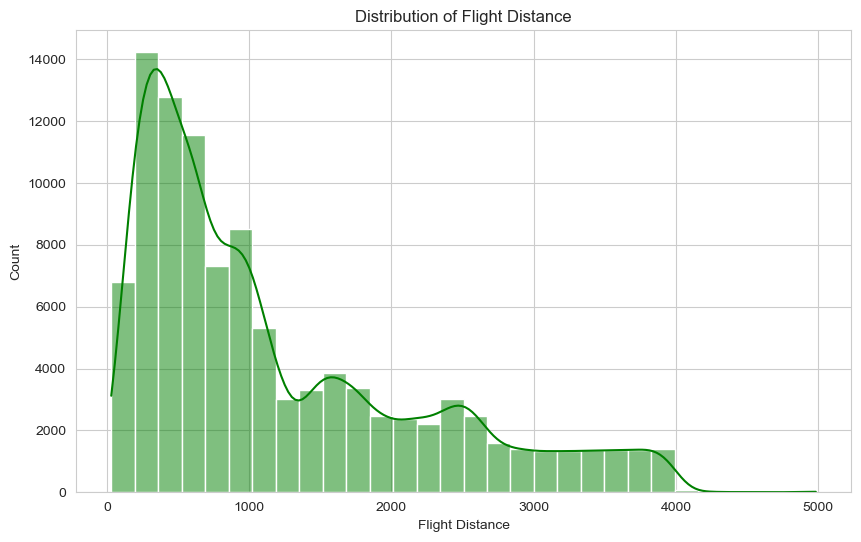

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Flight Distance'], kde=True, bins=30, color='green')
plt.title('Distribution of Flight Distance')
plt.show()

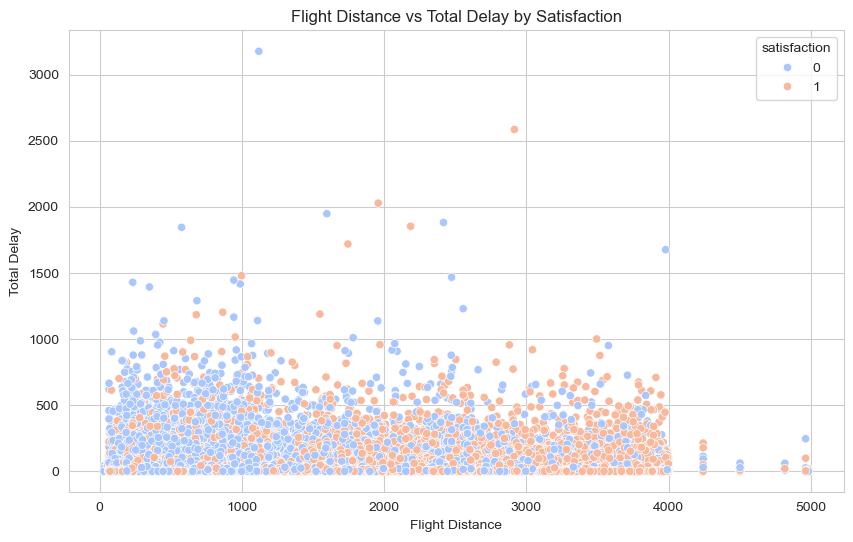

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight Distance', y='Total Delay', hue='satisfaction', data=df, palette='coolwarm')
plt.title('Flight Distance vs Total Delay by Satisfaction')
plt.show()

In [21]:
# Drop original delay columns to avoid redundancy
df.drop(columns=["Departure Delay in Minutes", "Arrival Delay in Minutes"], inplace=True)

In [25]:
df.to_csv("before_split.csv")

In [27]:
# Handling Imbalanced Data using SMOTE
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

### Encode categorical variables

In [29]:
df_cat = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=df_cat, drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normalize or standardize

In [33]:
scaler = MinMaxScaler()
X_train_sm = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Data Imbalance Check

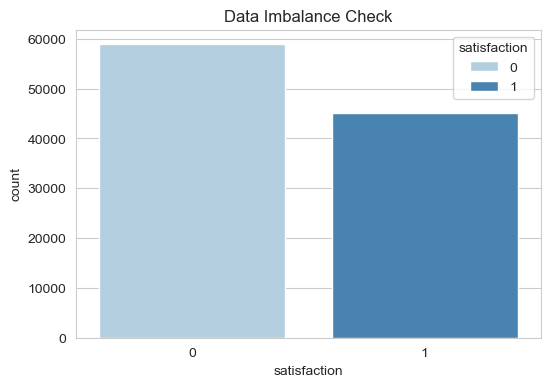

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='satisfaction', hue='satisfaction', data=df, palette='Blues')
plt.title('Data Imbalance Check')
plt.show()

### Apply SMOTE to balance classes

In [37]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_sm, y_train)
print(pd.Series(y_train_sm).value_counts())

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


satisfaction
0    41324
1    41324
Name: count, dtype: int64


In [39]:
# Save SMOTE-applied data to CSV
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)
X_train_sm_df['satisfaction'] = y_train_sm
X_train_sm_df.to_csv('SMOTE_Train_Dataset.csv', index=False)

### Model Training and Evaluation with MLflow

In [51]:
mlflow.set_experiment("Customer_Satisfaction_Prediction")

2025/03/12 19:39:33 INFO mlflow.tracking.fluent: Experiment with name 'Customer_Satisfaction_Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///D:/GUVI-DS/Mini-Project4/mlruns/688142813373680770', creation_time=1741788573624, experiment_id='688142813373680770', last_update_time=1741788573624, lifecycle_stage='active', name='Customer_Satisfaction_Prediction', tags={}>

In [53]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

In [55]:
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
}

In [57]:
best_model = None
best_score = 0

Logistic Regression Before Tuning Metrics: Accuracy: 0.8685, Precision: 0.8442, Recall: 0.8570, F1 Score: 0.8506
Logistic Regression Best Params: {'C': 1, 'solver': 'liblinear'}
Logistic Regression After Tuning Metrics: Accuracy: 0.8684, Precision: 0.8440, Recall: 0.8572, F1 Score: 0.8505
Logistic Regression Confusion Matrix:
[[15398  2157]
 [ 1945 11672]]



<Figure size 600x600 with 0 Axes>

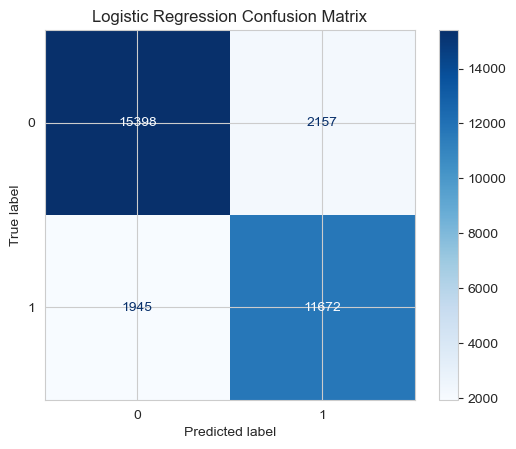

2025/03/12 21:06:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Before Tuning Metrics: Accuracy: 0.9617, Precision: 0.9704, Recall: 0.9410, F1 Score: 0.9555
Random Forest Best Params: {'max_depth': 7, 'n_estimators': 300}
Random Forest After Tuning Metrics: Accuracy: 0.9323, Precision: 0.9214, Recall: 0.9238, F1 Score: 0.9226
Random Forest Confusion Matrix:
[[16482  1073]
 [ 1037 12580]]



<Figure size 600x600 with 0 Axes>

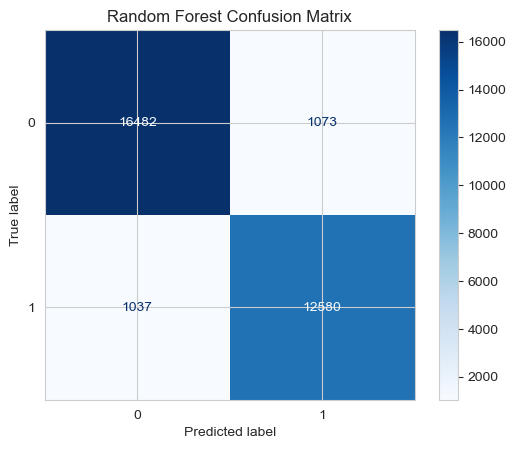

2025/03/12 21:15:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting Before Tuning Metrics: Accuracy: 0.9405, Precision: 0.9372, Recall: 0.9257, F1 Score: 0.9314
Gradient Boosting Best Params: {'learning_rate': 0.2, 'n_estimators': 300}
Gradient Boosting After Tuning Metrics: Accuracy: 0.9588, Precision: 0.9658, Recall: 0.9390, F1 Score: 0.9522
Gradient Boosting Confusion Matrix:
[[17102   453]
 [  831 12786]]



<Figure size 600x600 with 0 Axes>

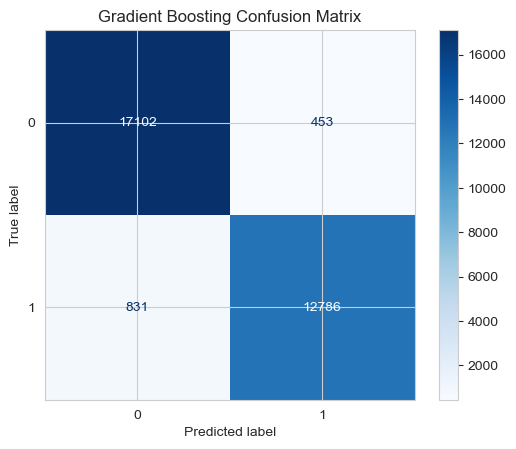

2025/03/12 21:43:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


K-Nearest Neighbors Before Tuning Metrics: Accuracy: 0.9264, Precision: 0.9324, Recall: 0.8965, F1 Score: 0.9141
K-Nearest Neighbors Best Params: {'n_neighbors': 5, 'weights': 'distance'}
K-Nearest Neighbors After Tuning Metrics: Accuracy: 0.9267, Precision: 0.9328, Recall: 0.8967, F1 Score: 0.9144
K-Nearest Neighbors Confusion Matrix:
[[16675   880]
 [ 1406 12211]]



<Figure size 600x600 with 0 Axes>

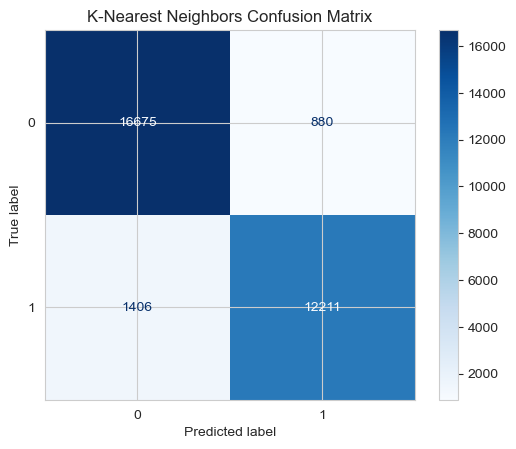

2025/03/12 21:45:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost Before Tuning Metrics: Accuracy: 0.9610, Precision: 0.9679, Recall: 0.9419, F1 Score: 0.9547
XGBoost Best Params: {'learning_rate': 0.2, 'n_estimators': 300}
XGBoost After Tuning Metrics: Accuracy: 0.9616, Precision: 0.9690, Recall: 0.9421, F1 Score: 0.9554
XGBoost Confusion Matrix:
[[17145   410]
 [  788 12829]]



<Figure size 600x600 with 0 Axes>

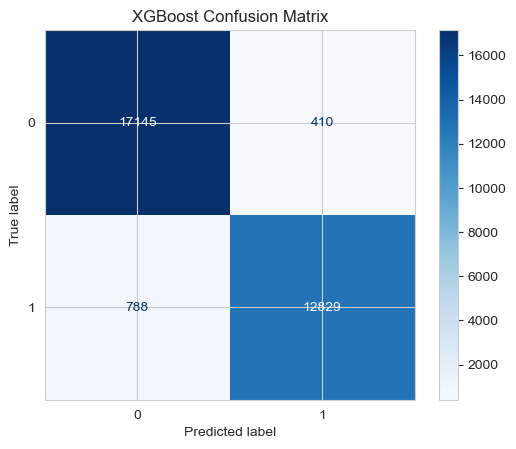

2025/03/12 21:46:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


The best model is: XGBoost with accuracy: 0.9616


In [61]:
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Before tuning metrics
        model.fit(X_train_sm, y_train_sm)
        y_pred_before = model.predict(X_test)
        before_acc = accuracy_score(y_test, y_pred_before)
        before_precision = precision_score(y_test, y_pred_before)
        before_recall = recall_score(y_test, y_pred_before)
        before_f1 = f1_score(y_test, y_pred_before)
        print(f'{model_name} Before Tuning Metrics: Accuracy: {before_acc:.4f}, Precision: {before_precision:.4f}, Recall: {before_recall:.4f}, F1 Score: {before_f1:.4f}')

        # Hyperparameter tuning
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_sm, y_train_sm)
        model = grid_search.best_estimator_
        print(f'{model_name} Best Params: {grid_search.best_params_}')

        # Log best parameters in MLflow
        mlflow.log_param("model_name", model_name)
        for param, value in grid_search.best_params_.items():
            mlflow.log_param(param, value)

        # After tuning metrics
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f'{model_name} After Tuning Metrics: Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
        print(f'{model_name} Confusion Matrix:\n{cm}\n')

        # Track best model
        if acc > best_score:
            best_score = acc
            best_model = model_name

        # Visualization of confusion matrix
        plt.figure(figsize=(6, 6))
        ConfusionMatrixDisplay(cm).plot(cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()

        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.sklearn.log_model(model, model_name)

        joblib.dump(model, f'{model_name.replace(" ", "_")}.pkl')

print(f'The best model is: {best_model} with accuracy: {best_score:.4f}')

In [85]:
feature_names = X_train.columns.tolist()
print(feature_names)

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Total Delay', 'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']
